In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [2]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, MaxPool2D 
from tensorflow.keras.initializers import RandomNormal

In [3]:
################################################################################################################################

In [4]:
X_train_tmp_folder_path = 'C:\hyundai_cgan_data' + '\\rectangular_vane_design' + '\\tmp_input_data_rectangular'
X_train_dsp_folder_path = 'C:\hyundai_cgan_data' + '\\rectangular_vane_design' + '\\dsp_input_data_rectangular'
Y_train_folder_path = 'C:\hyundai_cgan_data' + '\\rectangular_vane_design'  '\\rectangular_vane_output'

In [5]:
X_train_tmp_elements = os.listdir(X_train_tmp_folder_path) 
X_train_dsp_elements = os.listdir(X_train_dsp_folder_path) 
Y_train_elements = os.listdir(Y_train_folder_path)

In [6]:
################################################################################################################################

In [7]:
i=0
for elm in X_train_tmp_elements:
    i=i+1    
print(i)

20


In [8]:
i=0
for elm in X_train_dsp_elements:
    i=i+1    
print(i)

20


In [9]:
j=0
for elm in Y_train_elements:
    j=j+1    
print(j)

20


In [10]:
################################################################################################################################

In [11]:
X_train = np.zeros((20,256,256,2))
Y_train = np.zeros((20,256,256,1))

In [12]:
################################################################################################################################

In [13]:
# DEVELOPING X_train MATRIX

for index, (tmp_element, dsp_element) in enumerate(zip(X_train_tmp_elements, X_train_dsp_elements)):
    # Load images for each channel
    tmp_element_path = os.path.join(X_train_tmp_folder_path, tmp_element)
    dsp_element_path = os.path.join(X_train_dsp_folder_path, dsp_element)
    img_tmp = imread(tmp_element_path)
    img_dsp = imread(dsp_element_path)
      
    # Reshape images for each channel
    img_tmp = img_tmp.reshape((256,256, 1))
    img_dsp = img_dsp.reshape((256,256, 1))
    
    # Combine channels
    img_combined = np.concatenate((img_tmp, img_dsp), axis=2)
    
    # Assign to X_train
    X_train[index] = img_combined

In [14]:
# DEVELOPING Y_train MATRIX
for index,Y_train_element in enumerate(Y_train_elements):
    element_path = os.path.join(Y_train_folder_path, Y_train_element)
    img = imread(element_path)
    img = np.mean(img, axis=2)
    img = img/255
    img = img.reshape((256, 256, 1))
    Y_train[index] = img

In [15]:
################################################################################################################################

In [17]:
model = Sequential()
    
init = RandomNormal(stddev=0.02, seed=42) 

#CONVOLUTIONAL LAYER 1
model.add(Conv2D(filters=32,kernel_size=(2,2),strides=(1,1),padding='same',input_shape=(256,256,2),activation='relu', kernel_initializer=init))
#MAXPOOLING LAYER
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

#CONVOLUTIONAL LAYER 2
model.add(Conv2D(filters= 64,kernel_size=(2,2),strides=(1,1),padding='same',activation='relu', kernel_initializer=init))
#MAXPOOLING LAYER
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

#CONVOLUTIONAL LAYER 3
model.add(Conv2D(filters= 128,kernel_size=(2,2),strides=(1,1),padding='same',activation='relu', kernel_initializer=init))
#MAXPOOLING LAYER
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

#CONVOLUTIONAL LAYER 4
model.add(Conv2D(filters= 256,kernel_size=(4,4),strides=(1,1),padding='same',activation='relu', kernel_initializer=init))
#MAXPOOLING LAYER
model.add(MaxPool2D(pool_size=(4,4),strides=(4,4)))

#CONVOLUTIONAL LAYER 2
model.add(Conv2D(filters= 512,kernel_size=(2,2),strides=(1,1),padding='same',activation='relu', kernel_initializer=init))
#MAXPOOLING LAYER
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
   
# FLATTENING THE ABOVE LAYER
model.add(tf.keras.layers.Flatten())

# DENSE LAYER 1
model.add(tf.keras.layers.Dense(units=4000, activation='relu', kernel_initializer=init))
          
# DENSE LAYER 2
model.add(tf.keras.layers.Dense(units=8192, activation='relu', kernel_initializer=init))          

# RESHAPING THE ABOVE LAYER
model.add(tf.keras.layers.Reshape(target_shape=(4,4,512)))
          
#TRANSPOSE CONVOLUTIONAL LAYER 1
model.add(Conv2DTranspose(filters=256,kernel_size=(2,2),strides=(2,2),activation='relu', kernel_initializer=init))

#TRANSPOSE CONVOLUTIONAL LAYER 2
model.add(Conv2DTranspose(filters=128,kernel_size=(4,4),strides=(4,4),activation='relu', kernel_initializer=init))

#TRANSPOSE CONVOLUTIONAL LAYER 3
model.add(Conv2DTranspose(filters=64,kernel_size=(2,2),strides=(2,2),activation='relu', kernel_initializer=init))
    
#TRANSPOSE CONVOLUTIONAL LAYER 4
model.add(Conv2DTranspose(filters=32,kernel_size=(2,2),strides=(2,2),activation='relu', kernel_initializer=init))

#TRANSPOSE CONVOLUTIONAL LAYER 5
model.add(Conv2DTranspose(filters=1,kernel_size=(2,2),strides=(2,2),activation='relu', kernel_initializer=init))

#COMPILING THE MODEL
model.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      288       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 128)       0

In [22]:
model.fit(X_train,Y_train,epochs = 2000)

Epoch 1/2000
1/1 [==============================] - 3s 3s/step - loss: 0.9532
Epoch 2/2000
1/1 [==============================] - 2s 2s/step - loss: 0.9493
Epoch 3/2000
1/1 [==============================] - 2s 2s/step - loss: 0.9432
Epoch 4/2000
1/1 [==============================] - 2s 2s/step - loss: 0.9198
Epoch 5/2000
1/1 [==============================] - 2s 2s/step - loss: 0.7497
Epoch 6/2000
1/1 [==============================] - 2s 2s/step - loss: 0.7197
Epoch 7/2000
1/1 [==============================] - 2s 2s/step - loss: 0.5805
Epoch 8/2000
1/1 [==============================] - 2s 2s/step - loss: 0.7181
Epoch 9/2000
1/1 [==============================] - 2s 2s/step - loss: 0.7455
Epoch 10/2000
1/1 [==============================] - 2s 2s/step - loss: 0.7102
Epoch 11/2000
1/1 [==============================] - 2s 2s/step - loss: 0.6017
Epoch 12/2000
1/1 [==============================] - 2s 2s/step - loss: 0.3980
Epoch 13/2000
1/1 [==============================] - 2s 2s/st

1/1 [==============================] - 2s 2s/step - loss: 0.0166
Epoch 207/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0166
Epoch 208/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0165
Epoch 209/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0165
Epoch 210/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0164
Epoch 211/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0164
Epoch 212/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0163
Epoch 213/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0163
Epoch 214/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0162
Epoch 215/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0162
Epoch 216/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0162
Epoch 217/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0161
Epoch 218/2000
1/1 [==============================] - 2

1/1 [==============================] - 2s 2s/step - loss: 0.0128
Epoch 411/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0126
Epoch 412/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0125
Epoch 413/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0122
Epoch 414/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0120
Epoch 415/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0119
Epoch 416/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0118
Epoch 417/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0118
Epoch 418/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0118
Epoch 419/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0119
Epoch 420/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0120
Epoch 421/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0120
Epoch 422/2000
1/1 [==============================] - 2

1/1 [==============================] - 2s 2s/step - loss: 0.0101
Epoch 615/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0101
Epoch 616/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0101
Epoch 617/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0101
Epoch 618/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0101
Epoch 619/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0101
Epoch 620/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0102
Epoch 621/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0102
Epoch 622/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0103
Epoch 623/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0105
Epoch 624/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0108
Epoch 625/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0112
Epoch 626/2000
1/1 [==============================] - 2

1/1 [==============================] - 2s 2s/step - loss: 0.0077
Epoch 819/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0076
Epoch 820/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0075
Epoch 821/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0074
Epoch 822/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0073
Epoch 823/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0072
Epoch 824/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0072
Epoch 825/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0071
Epoch 826/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0071
Epoch 827/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0071
Epoch 828/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0070
Epoch 829/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0070
Epoch 830/2000
1/1 [==============================] - 2

1/1 [==============================] - 2s 2s/step - loss: 0.0044
Epoch 1023/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0042
Epoch 1024/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0039
Epoch 1025/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0038
Epoch 1026/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0037
Epoch 1027/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0036
Epoch 1028/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0036
Epoch 1029/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0036
Epoch 1030/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0036
Epoch 1031/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0037
Epoch 1032/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0037
Epoch 1033/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0038
Epoch 1034/2000
1/1 [=======================

1/1 [==============================] - 2s 2s/step - loss: 0.0021
Epoch 1225/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0021
Epoch 1226/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0021
Epoch 1227/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0021
Epoch 1228/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0021
Epoch 1229/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0021
Epoch 1230/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0021
Epoch 1231/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0021
Epoch 1232/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0021
Epoch 1233/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0021
Epoch 1234/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0022
Epoch 1235/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0022
Epoch 1236/2000
1/1 [=======================

1/1 [==============================] - 2s 2s/step - loss: 0.0012
Epoch 1427/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0011
Epoch 1428/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0011
Epoch 1429/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0011
Epoch 1430/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0011
Epoch 1431/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0011
Epoch 1432/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0011
Epoch 1433/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0011
Epoch 1434/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0011
Epoch 1435/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0011
Epoch 1436/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0011
Epoch 1437/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0012
Epoch 1438/2000
1/1 [=======================

1/1 [==============================] - 2s 2s/step - loss: 8.5639e-04
Epoch 1626/2000
1/1 [==============================] - 2s 2s/step - loss: 8.8416e-04
Epoch 1627/2000
1/1 [==============================] - 2s 2s/step - loss: 9.3706e-04
Epoch 1628/2000
1/1 [==============================] - 2s 2s/step - loss: 9.9791e-04
Epoch 1629/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0011
Epoch 1630/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0012
Epoch 1631/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0015
Epoch 1632/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0017
Epoch 1633/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0023
Epoch 1634/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0026
Epoch 1635/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0037
Epoch 1636/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0037
Epoch 1637/2000
1/1 [=======

1/1 [==============================] - 2s 2s/step - loss: 0.0028
Epoch 1822/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0034
Epoch 1823/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0028
Epoch 1824/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0029
Epoch 1825/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0021
Epoch 1826/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0017
Epoch 1827/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0012
Epoch 1828/2000
1/1 [==============================] - 2s 2s/step - loss: 8.6194e-04
Epoch 1829/2000
1/1 [==============================] - 2s 2s/step - loss: 6.5832e-04
Epoch 1830/2000
1/1 [==============================] - 2s 2s/step - loss: 6.0630e-04
Epoch 1831/2000
1/1 [==============================] - 2s 2s/step - loss: 6.6939e-04
Epoch 1832/2000
1/1 [==============================] - 2s 2s/step - loss: 7.9818e-04
Epoch 1833/2000
1/1 [===

1/1 [==============================] - 2s 2s/step - loss: 8.7225e-04
Epoch 1920/2000
1/1 [==============================] - 2s 2s/step - loss: 7.6262e-04
Epoch 1921/2000
1/1 [==============================] - 2s 2s/step - loss: 6.3672e-04
Epoch 1922/2000
1/1 [==============================] - 2s 2s/step - loss: 5.6371e-04
Epoch 1923/2000
1/1 [==============================] - 2s 2s/step - loss: 5.4338e-04
Epoch 1924/2000
1/1 [==============================] - 2s 2s/step - loss: 5.6861e-04
Epoch 1925/2000
1/1 [==============================] - 2s 2s/step - loss: 6.2032e-04
Epoch 1926/2000
1/1 [==============================] - 2s 2s/step - loss: 6.6701e-04
Epoch 1927/2000
1/1 [==============================] - 2s 2s/step - loss: 7.0848e-04
Epoch 1928/2000
1/1 [==============================] - 2s 2s/step - loss: 7.0517e-04
Epoch 1929/2000
1/1 [==============================] - 2s 2s/step - loss: 6.9414e-04
Epoch 1930/2000
1/1 [==============================] - 2s 2s/step - loss: 6.4926e

In [23]:
################################################################################################################################

In [21]:
pred_in_com_1_tmp_path = 'C:\hyundai_cgan_data' + '\\test_inputs' + '\\tmp_test_input' + '\\tmp_test_com_1_in.png'
pred_in_com_1_dsp_path = 'C:\hyundai_cgan_data' + '\\test_inputs' + '\\dsp_test_input' + '\\dsp_test_com_1_in.png'

pred_in_com_1_tmp = imread(pred_in_com_1_tmp_path)
pred_in_com_1_dsp = imread(pred_in_com_1_dsp_path)

pred_in_com_1_tmp = pred_in_com_1_tmp.reshape((256, 256, 1))
pred_in_com_1_dsp = pred_in_com_1_dsp.reshape((256, 256, 1))

pred_in_com_1 = np.concatenate((pred_in_com_1_tmp, pred_in_com_1_dsp), axis=2)

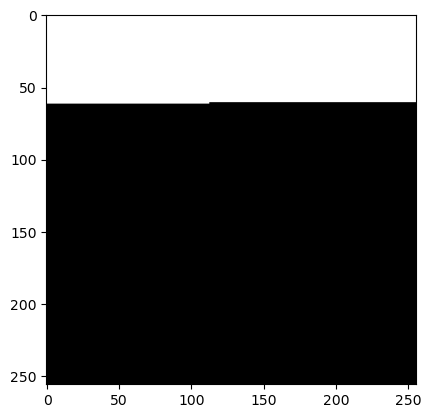

In [22]:
plt.imshow(pred_in_com_1_tmp, cmap = 'gray')

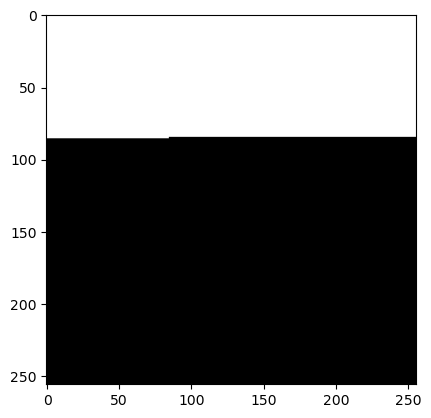

In [23]:
plt.imshow(pred_in_com_1_dsp, cmap = 'gray')

1/1 [==============================] - 0s 205ms/step


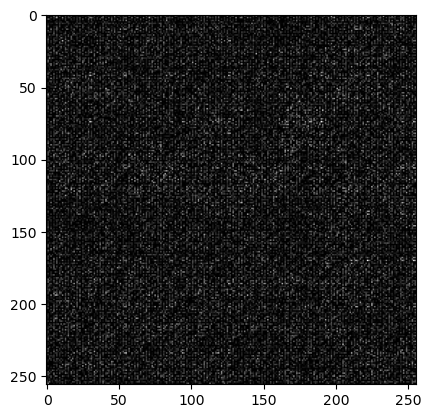

In [24]:
pred_in_com_1 = pred_in_com_1.reshape((1,256,256,2))

pred_out_com_1 = model.predict(pred_in_com_1)

pred_out_com_1 = pred_out_com_1.reshape((256, 256))

plt.imshow(pred_out_com_1, cmap = 'gray')

In [28]:
################################################################################################################################

In [29]:
pred_in_com_2_tmp_path = 'C:\hyundai_cgan_data' + '\\test_inputs'+ '\\tmp_test_input' + '\\tmp_test_com_2_in.png'
pred_in_com_2_dsp_path = 'C:\hyundai_cgan_data' + '\\test_inputs' + '\\dsp_test_input' + '\\dsp_test_com_2_in.png'

pred_in_com_2_tmp = imread(pred_in_com_2_tmp_path)
pred_in_com_2_dsp = imread(pred_in_com_2_dsp_path)

pred_in_com_2_tmp = pred_in_com_2_tmp.reshape((256, 256, 1))
pred_in_com_2_dsp = pred_in_com_2_dsp.reshape((256, 256, 1))

pred_in_com_2 = np.concatenate((pred_in_com_2_tmp, pred_in_com_2_dsp), axis=2)

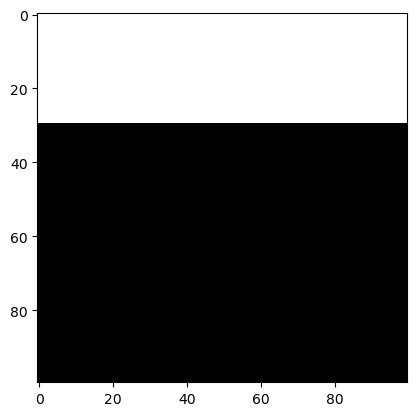

In [30]:
plt.imshow(pred_in_com_2_tmp, cmap = 'gray')

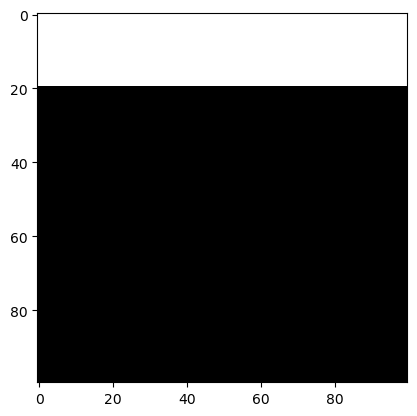

In [31]:
plt.imshow(pred_in_com_2_dsp, cmap = 'gray')

1/1 [==============================] - 0s 45ms/step


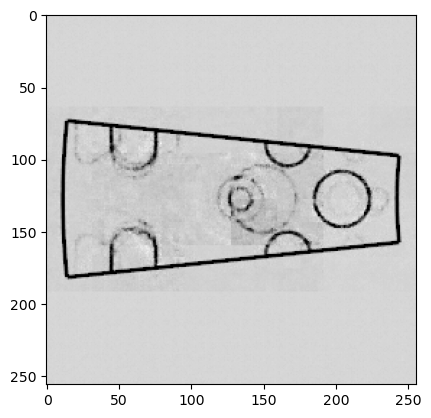

In [32]:
pred_in_com_2 = pred_in_com_2.reshape((1,256, 256, 2))

pred_out_com_2 = model.predict(pred_in_com_2)

pred_out_com_2 = pred_out_com_2.reshape((256, 256))

plt.imshow(pred_out_com_2, cmap = 'gray')

In [33]:
################################################################################################################################

In [34]:
pred_in_com_3_tmp_path = 'C:\hyundai_cgan_data' + '\\test_inputs' + '\\tmp_test_input' + '\\tmp_test_com_3_in.png'
pred_in_com_3_dsp_path = 'C:\hyundai_cgan_data' + '\\test_inputs' + '\\dsp_test_input' + '\\dsp_test_com_3_in.png'

pred_in_com_3_tmp = imread(pred_in_com_3_tmp_path)
pred_in_com_3_dsp = imread(pred_in_com_3_dsp_path)

pred_in_com_3_tmp = pred_in_com_3_tmp.reshape((256, 256, 1))
pred_in_com_3_dsp = pred_in_com_3_dsp.reshape((256, 256, 1))

pred_in_com_3 = np.concatenate((pred_in_com_3_tmp, pred_in_com_3_dsp), axis=2)

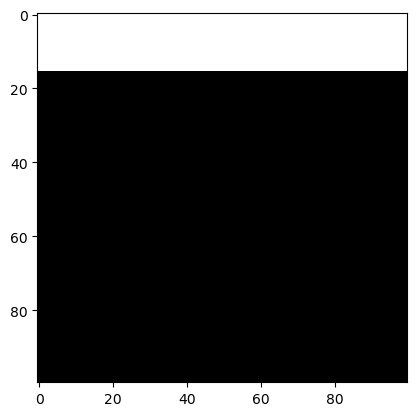

In [35]:
plt.imshow(pred_in_com_3_tmp, cmap = 'gray')

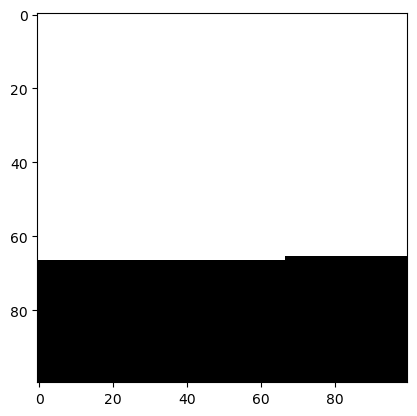

In [36]:
plt.imshow(pred_in_com_3_dsp, cmap = 'gray')

1/1 [==============================] - 0s 43ms/step


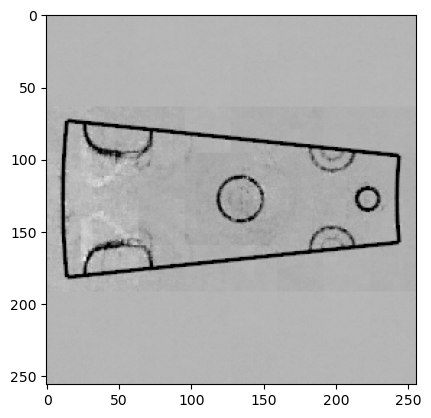

In [37]:
pred_in_com_3 = pred_in_com_3.reshape((1,256, 256, 2))

pred_out_com_3 = model.predict(pred_in_com_3)

pred_out_com_3 = pred_out_com_3.reshape((256, 256))

plt.imshow(pred_out_com_3, cmap = 'gray')

In [38]:
################################################################################################################################

In [39]:
pred_in_com_4_tmp_path = 'C:\hyundai_cgan_data' + '\\test_inputs' + '\\tmp_test_input' + '\\tmp_test_com_4_in.png'
pred_in_com_4_dsp_path = 'C:\hyundai_cgan_data' + '\\test_inputs' + '\\dsp_test_input' + '\\dsp_test_com_4_in.png'

pred_in_com_4_tmp = imread(pred_in_com_4_tmp_path)
pred_in_com_4_dsp = imread(pred_in_com_4_dsp_path)

pred_in_com_4_tmp = pred_in_com_4_tmp.reshape((256, 256, 1))
pred_in_com_4_dsp = pred_in_com_4_dsp.reshape((256, 256, 1))

pred_in_com_4 = np.concatenate((pred_in_com_4_tmp, pred_in_com_4_dsp), axis=2)

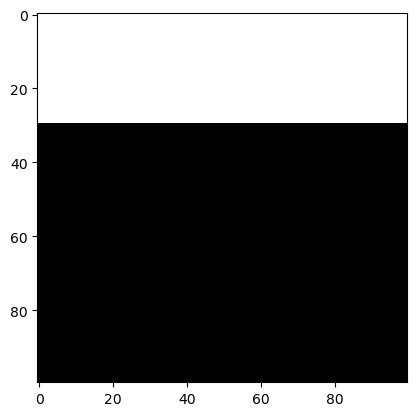

In [40]:
plt.imshow(pred_in_com_4_tmp, cmap = 'gray')

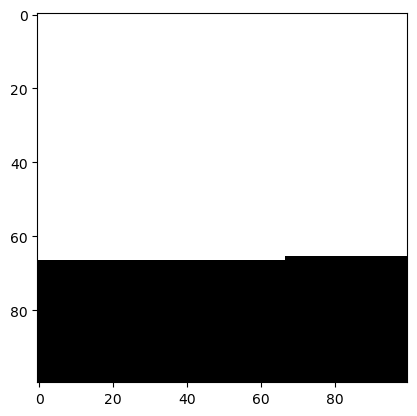

In [41]:
plt.imshow(pred_in_com_4_dsp, cmap = 'gray')

1/1 [==============================] - 0s 43ms/step


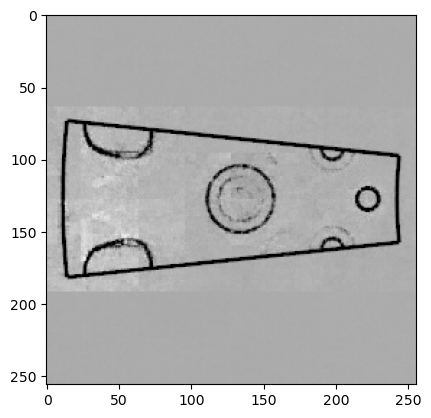

In [42]:
pred_in_com_4 = pred_in_com_4.reshape((1,256, 256, 2))

pred_out_com_4 = model.predict(pred_in_com_4)

pred_out_com_4 = pred_out_com_4.reshape((256, 256))

plt.imshow(pred_out_com_4, cmap = 'gray')

In [43]:
################################################################################################################################

In [44]:
pred_in_com_5_tmp_path = 'C:\hyundai_cgan_data' + '\\test_inputs' + '\\tmp_test_input' + '\\tmp_test_com_5_in.png'
pred_in_com_5_dsp_path = 'C:\hyundai_cgan_data' + '\\test_inputs' + '\\dsp_test_input' + '\\dsp_test_com_5_in.png'

pred_in_com_5_tmp = imread(pred_in_com_5_tmp_path)
pred_in_com_5_dsp = imread(pred_in_com_5_dsp_path)

pred_in_com_5_tmp = pred_in_com_5_tmp.reshape((256, 256, 1))
pred_in_com_5_dsp = pred_in_com_5_dsp.reshape((256, 256, 1))

pred_in_com_5 = np.concatenate((pred_in_com_5_tmp, pred_in_com_5_dsp), axis=2)

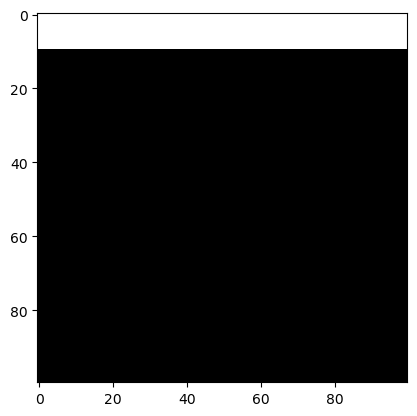

In [45]:
plt.imshow(pred_in_com_5_tmp, cmap = 'gray')

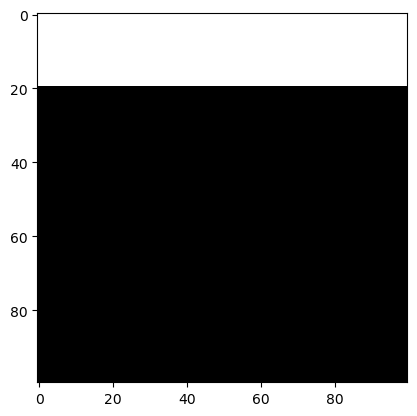

In [46]:
plt.imshow(pred_in_com_5_dsp, cmap = 'gray')

1/1 [==============================] - 0s 42ms/step


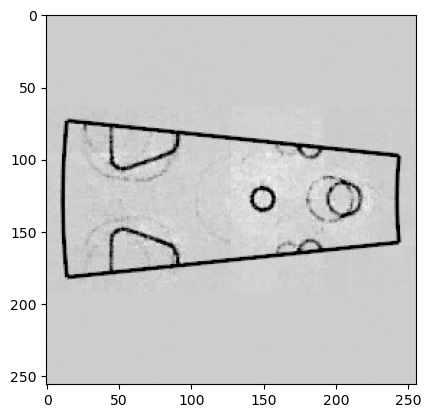

In [47]:
pred_in_com_5 = pred_in_com_5.reshape((1, 256, 256, 2))

pred_out_com_5 = model.predict(pred_in_com_5)

pred_out_com_5 = pred_out_com_5.reshape((256, 256))

plt.imshow(pred_out_com_5, cmap = 'gray')

In [48]:
################################################################################################################################

In [49]:
model.save("hyundai_rectangular_256_256_unet_it_1")

INFO:tensorflow:Assets written to: hyundai_circular_unet_it_2\assets


INFO:tensorflow:Assets written to: hyundai_circular_unet_it_2\assets
